<a href="https://colab.research.google.com/github/sankhla2/DL/blob/main/Cat_v_s_Dog_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>  Kaggle Dataset :https://www.kaggle.com/datasets/salader/dogs-vs-cats

>> ** GPU

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [13]:
!chmod 600 /root/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:34<00:00, 41.7MB/s]
100% 1.06G/1.06G [00:34<00:00, 33.4MB/s]


In [15]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [38]:
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,Flatten,BatchNormalization,Dropout


In [39]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32,
    image_size = (256,256)
)


test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred' ,
    label_mode = 'int' ,
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [40]:
# normalization 
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image , label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)


In [41]:
# way of reduce the overfitting

# add more data
# data augmentation
# l1,l2 regularizer
#Dropout 
#batch Norm
# reduce complexity 

for reduce the overfitting
1.Dropout
2.batch Norm

In [42]:
# creating cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Flatten())

# 3 fully connected layers      
model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation= 'sigmoid'))


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [44]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [22]:
# run
history = model.fit(train_ds,epochs = 10,validation_data = test_ds)


Epoch 1/10
625/625 [==============================] - 90s 117ms/step - loss: 1.1829 - accuracy: 0.6239 - val_loss: 0.6302 - val_accuracy: 0.6618
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5101 - accuracy: 0.7526 - val_loss: 0.5308 - val_accuracy: 0.7460
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4345 - accuracy: 0.8031 - val_loss: 0.8610 - val_accuracy: 0.6768
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3627 - accuracy: 0.8446 - val_loss: 0.6728 - val_accuracy: 0.7388
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2642 - accuracy: 0.8887 - val_loss: 0.5072 - val_accuracy: 0.8048
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.1719 - accuracy: 0.9308 - val_loss: 0.7611 - val_accuracy: 0.7454
Epoch 7/10
625/625 [==============================] - 70s 112ms/step - loss: 0.1114 - accuracy: 0.9565 - val_loss: 0.8869 - val_ac

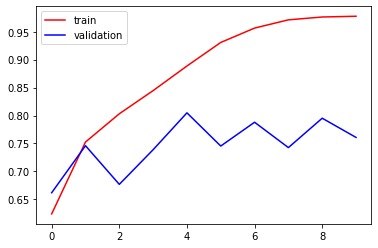

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

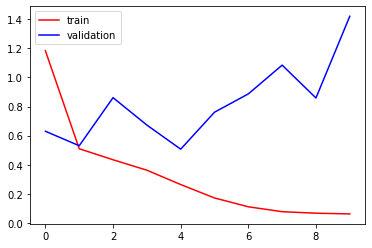

In [24]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [25]:
import cv2


In [45]:
test_img = cv2.imread('/content/cat.jpeg')


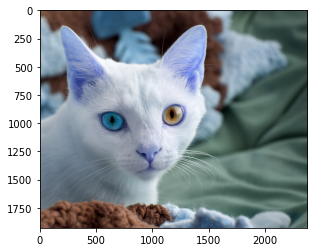

In [46]:
plt.imshow(test_img)

In [47]:
test_img.shape

(1927, 2370, 3)

In [48]:
test_img = cv2.resize(test_img,(256,256))

In [49]:
test_input = test_img.reshape((1,256,256,3))

In [50]:
model.predict(test_input)

1/1 [==============================] - 0s 123ms/step


array([[1.7070667e-19]], dtype=float32)